In [1]:
import pandas as pd
import numpy as np
import os, sys 
import re
import matplotlib.pyplot as plt

sys.path.append(os.getcwd())

In [2]:
# [0] Prepare datasets
# load penal code: BJS
file = "C:\data_folder\BJS Offense_Code_Crosswalk.xlsx"
dfBJS = pd.read_excel(os.path.join(os.path.dirname('__file__'),file))

# load penal code: MFJ
file = "C:\data_folder\MFJ Charge Coding Crosswalk.xlsx"
dfMFJ = pd.read_excel(os.path.join(os.path.dirname('__file__'),file))



In [113]:

# load state dataset: Louisiana
file = "C:\data_folder\LA_East_Baton_Rouge_Charges.csv"
dfLouisiana = pd.read_csv(os.path.join(os.path.dirname('__file__'),file))

# load state dataset: Michigan
file = "C:\data_folder\MI_Wayne_Charges.csv"
dfMichigan = pd.read_csv(os.path.join(os.path.dirname('__file__'),file))

# load state dataset: New York
file = "C:\data_folder\data_NY.csv"
dfNY = pd.read_csv(os.path.join(os.path.dirname('__file__'),file))

In [92]:
# load state dataset: Arkansas
file = "C:\data_folder\AR_Washington_Charges.csv"
dfArkansas = pd.read_csv(os.path.join(os.path.dirname('__file__'),file))


In [93]:
low_bail = ["0","1","2"]


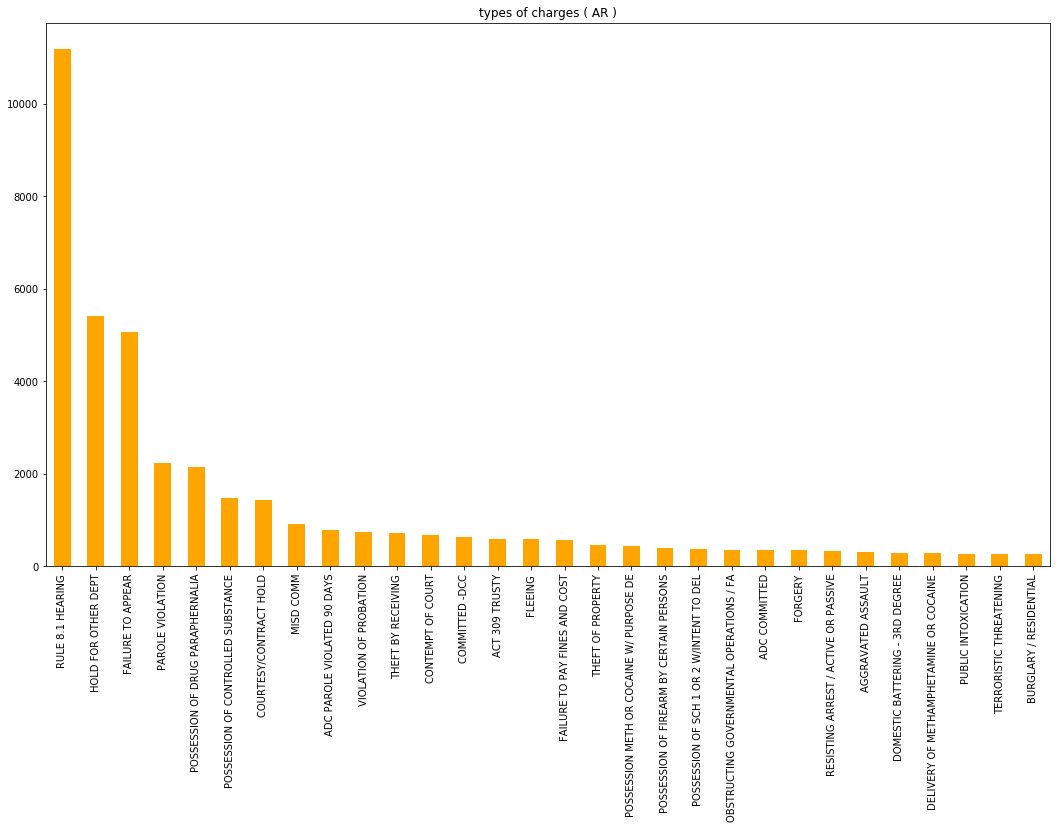

In [94]:
# data cleaning for Arkansas
# 0 dollar bond for Arkansas is an indication of a grouping with other crimes
dfArkansas['Bond'] = dfArkansas['Bond'].str.replace('\&', '').str.replace('nbsp', '').str.replace('$', '').str.replace(',', '')
dfArkansas['Charge'] = dfArkansas['Charge'].str.replace('\&', '').str.replace('nbsp', '')
dfArkansas['Charge'].value_counts()[:30].plot(kind="bar",color="orange",title="types of charges ( AR )",figsize=(18,10))

In [95]:
dfArkansas.shape

(49960, 30)

In [96]:
#Looking into possession related crimes
#People who has committed at least one drug related crimes
searchfor = ['SUBSTANCE', 'PARAPHERNALIA']
AR_drugs = dfArkansas.loc[dfArkansas['Charge'].str.contains('|'.join(searchfor))].drop_duplicates(subset=['Name'],keep= 'first')
AR_drugnames = AR_drugs[['Name']] 
AR_drugnames

,Name
12,JUSTIN ALLEN
21,MICHAEL ALLEN
58,MARIA ARAMBULA-NIETO
92,DARRELL BAILEY
124,TAMVIA BARRON
...,...
35945,BROOKE BURROUGH
35950,EDWARD BURROUGH
36042,PATRICK CANADA
39997,CHEYENNE ELLIS


In [108]:
#There were lots of duplicates that came from having multiple scrape dates
#Removed entries where the bond amount sum was 0 

dfArkansas = dfArkansas.drop_duplicates(subset=['Name', 'Bond','Charge'],keep= 'first')
dfArkansas['Bond'] = pd.to_numeric(dfArkansas['Bond'], errors='coerce')
AR_drugs= dfArkansas.loc[dfArkansas['Name'].isin(AR_drugnames['Name'])]
#Quick view of the charges of the individuals with drug related crimes

AR_sum = AR_drugs.groupby(['Name','Sex','Race','Charge']).sum()
#AR_sum = AR_sum.loc[AR_sum['Bond']!=0]
AR_sum[['Bond']].head(30)

Bond
Name                  Sex Race     Charge                                           
ADRIAN OVIEDO         M   Hispanic ADC PAROLE VIOLATED                           0.0
                                   BATTERY - 3RD DEGREE                          0.0
                                   BURGLARY / RESIDENTIAL                        0.0
                                   COURTESY/CONTRACT HOLD                        0.0
                                   FORGERY                                       0.0
                                   HOLD FOR OTHER DEPT                           0.0
                                   POSSESSION METH OR COCAINE W/ PURPOSE DE      0.0
                                   POSSESSION OF DRUG PARAPHERNALIA              0.0
                                   POSSESSION OF SCH 1 OR 2 W/INTENT TO DEL      0.0
ADRIAN RODRIGUEZ      M   Hispanic AGGRAVATED ASSAULT                        25000.0
                                   CARRYING CERTAIN PROHIBITED WEAPONS           0.0
                                   CONTRIBUTING TO THE DELINQUENCY OF MINOR      0.0
                                   ENGAGE IN CONTINUING CRIME GANG OR ENTER      0.0
                                   POSSESSING INSTRUMENTS OF CRIME               0.0
                                   POSSESSION OF CONTROLLED SUBSTANCE            0.0
                                   RULE 8.1 HEARING                              0.0
AGUSTIN TORRES-GUZMAN M   Hispanic FAILURE TO APPEAR                         50000.0
                                   POSSESSION OF DRUG PARAPHERNALIA           2500.0
                                   RULE 8.1 HEARING                              0.0
                                   TAMPERING WITH PHYSICAL EVIDENCE / SUPPR      0.0
ALEJANDRO REYES       M   White    BURGLARY / RESIDENTIAL                        0.0
                                   CRIMINAL MISCHIEF - 1ST DEGREE                0.0
                                   DISTRIBUTION OF CONT SUB NEAR CERT FACIL      0.0
                                   FAILURE TO APPEAR                         50000.0
                                   FLEEING                                    3500.0
                                   HOLD FOR OTHER DEPT                           0.0
                                   POSSESSION OF CONTROLLED SUBSTANCE         2500.0
                                   POSSESSION OF DEFACED FIREARM                 0.0
                                   POSSESSION OF DRUG PARAPHERNALIA              0.0
                                   POSSESSION OF FIREARM BY CERTAIN PERSONS   5000.0

In [107]:
# data cleaning for LA
# I replaced the NaN with 0s ( assumption made )
# Preprocessing in the same steps as AR
dfLouisiana['Bond_Amount'].fillna('0', inplace=True)


#Looking into possession related crimes
#People who has committed at least one drug related crimes
searchfor2 = ['DRUG', 'MARIJUA']
LA_drugs = dfLouisiana.loc[dfLouisiana['Charge'].str.contains('|'.join(searchfor2),na=False)].drop_duplicates(subset=['Name'],keep= 'first')
LA_drugnames = LA_drugs[['Name']] 

dfLouisiana = dfLouisiana.drop_duplicates(subset=['Name', 'Bond_Amount','Charge'],keep= 'first')
dfLouisiana['Bond_Amount'] = pd.to_numeric(dfLouisiana['Bond_Amount'], errors='coerce')
LA_drugs= dfLouisiana.loc[dfLouisiana['Name'].isin(LA_drugnames['Name'])]
LA_drugs[['Name', 'Bond_Amount','Charge']]

LA_sum = LA_drugs.groupby(['Name','Sex','Race','Charge']).sum()
LA_sum[['Bond_Amount']].head(30)

Bond_Amount
Name                   Sex Race     Charge                           
ABRAHAM WASHINGTON     M   Black    DIST/MANF SCH1 DRUG      150000.0
ADAM GEROME PRINCE     M   Black    POSS SCH 1 DRUGS          15000.0
ADRIENNE LEIGH TALLEY  F   White    POSS SCH 2 DRUGS          13000.0
ALDRIC ANGELO BYRD     M   Black    POSS SCH 1 / MARIJUA      22500.0
ALDRICH RODNEY HARRIS  M   Black    DIST/MANF SCH 2 DRUG      15000.0
                                    DIST/PEACE/INTOXICAT        250.0
                                    DRINKING IN PUBLIC/C        200.0
                                    ENT/REM AFTER FORB/C        200.0
ALENA MICHELLE GOMES   F   White    POSS SCH 1 DRUGS          19000.0
ALEX PAUL FOURROUX     M   White    POSS MARIJUANA/CC           500.0
ALEXZANDRIA RODRIQUEZ  F   Hispanic POSS SCH 4 DRUGS           2500.0
ALFRED COLLINS         M   Black    D/L NOT IN POSS/CC          700.0
                                    POSS SCH 2 DRUGS           2000.0
                                    SPEEDING/CC                 700.0
                                    THEFT/MISD/SHOPLIFTI        500.0
ALPHONSE WILLIAMS      M   Black    DIST/MANF SCH 2 DRUG      22000.0
ALVIN O JUDSON         M   Black    POSS SCH 1 DRUGS            550.0
AMBRION A GRADNEY      F   Black    EQUIPMENT VIOL/CC          1400.0
                                    INSURANCE REQUIRED          200.0
                                    MVI CERTIFICATES/FAL        900.0
                                    POSS MARIJUANA/CC           500.0
ANDREW COMBEE          M   White    POSS SCH 1 / MARIJUA        500.0
ANDREW DAVID+ MORELAND M   White    POSS SCH 1 DRUGS           2500.0
ANDREW SMITH           M   Black    POSS SCH 1 DRUGS          38000.0
ANNIE SHATAE SEABERRY  F   Black    POSS SCH 1 / MARIJUA       6000.0
ANTHONY D PAUL         M   Black    POSS OF DRUG PARAPHE     205000.0
                                    POSS SCH 2 DRUGS         200000.0
                                    THEFT                      5000.0
                                    THEFT/MISD                 5000.0
ANTHONY GERALD GEORGE  M   Black    DIST/MANF SCH 4 DRUG     101000.0

In [99]:
# data cleaning for NY
# Check for time
searchfor3 = ['SUBS', 'MARIJUA']

dfNY = dfNY.loc[dfNY['bond_info'].astype(str).str.isnumeric()]
NY_drugs = dfNY.loc[dfNY['charges'].str.contains('|'.join(searchfor2),na=False)]
NY_drugs[['bond_info','charges']]

,bond_info,charges
830,1,221.15 MA (CRIM POSS MARIJUANA-4TH:2 OZ A Misd...
1338,2,220.03 MA (CRIM POSS CONTRL SUBST A Misdemeano...
2413,1,221.15 MA (CRIM POSS MARIJUANA-4TH:2 OZ A Misd...
2602,1,221.40 MA (CRIM SALE MARIJUANA-4TH A Misdemeanor)
2874,1,221.05 VT (UNLAW POSS MARIJUANA )
3097,1,221.05 VT (UNLAW POSS MARIJUANA )
3176,500,221.40 MA (CRIM SALE MARIJUANA-4TH A Misdemeanor)
4416,150002,110-125.25 FB (Attempted MURDER B Felony) |120...
4759,25002,221.10 MB (CRIM POSS MARIJUANA-5TH B Misdemean...
4892,50003,120.10 FB (ASSAULT-1ST B Felony) |240.20 VT (D...


In [109]:
#preprocessing MI

searchfor3 = ['SUBST', 'MARIJUA']
MI_drugs = dfMichigan.loc[dfMichigan['Charge'].str.contains('|'.join(searchfor3),na=False)].drop_duplicates(subset=['Name','Charge',' Bond_Amount: '],keep= 'first')
MI_drugnames = MI_drugs[['Name']] 

dfMichigan = dfMichigan.drop_duplicates(subset=['Name', 'Charge',' Bond_Amount: '],keep= 'first')
dfMichigan[' Bond_Amount: '] = pd.to_numeric(dfMichigan[' Bond_Amount: '], errors='coerce')

MI_drugs= dfMichigan.loc[dfMichigan['Name'].isin(MI_drugnames['Name'])]

MI_sum = MI_drugs.groupby(['Name','Charge']).sum()
MI_sum[[' Bond_Amount: ']].head(30)

C:\Users\Minyoung Na\anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Bond_Amount: 
Name                   Charge                                                            
AARON DALTON           CONTROLLED SUBSTANCE-DEL/MFG-50-449 GRAMS                   5000.0
ALEXANDER ACEVAL       CONTROLLED SUBSTANCE-DEL/MFG-450-999 GRAMS                750000.0
                       CONTROLLED SUBSTANCE-DELIVERY/MANUFACTURE (SCHE...        750000.0
ANDREW CRUSHSHON       CONTROLLED SUBSTANCE-DEL/MFG LESS THAN 50 GRAMS             5000.0
                       CONTROLLED SUBSTANCE-DELIVERY/MFG (NARC OR COCA...          5000.0
ANNETTE MAE DECK       CONTROLLED SUBSTANCE - USE                                     0.0
ANTHONY JUNIOR BENN    CONTROLLED SUBSTANCE-DEL/MFG LESS THAN 50 GRAMS           500000.0
                       POLICE OFFICER - FLEEING - THIRD DEGREE - VEHIC...        500000.0
                       PROBATION VIOLATION                                       500000.0
AVERY ANDERSON         CONTROLLED SUBSTANCE-DEL/MFG LESS THAN 50 GRAMS                0.0
                       CURFEW VIOLATIONS - AIDING & ABETTING                          0.0
                       MALICIOUS DESTRUCTION OF BUILDING - LESS THAN $200             0.0
BRANDON BARROS         CONTROLLED SUBSTANCE-POSSESSION/ANALOGUES                   5000.0
                       MOTOR VEHICLE / OPERATING CHARGE(S)                         5000.0
                       POLICE OFFICER - FLEEING - THIRD DEGREE - VEHIC...          5000.0
BRETT CHEARHART        CONTROLLED SUBSTANCE-POSSESSION (NARC/COCAINE) ...          7500.0
BRIAN LOWELL BLACKBURN CONTROLLED SUBSTANCE- POSSESSION DRUG PARAPHERN...           500.0
                       DISORDERLY PERSON - DRUNK                                    500.0
                       ORDINANCE VIOLATION                                          500.0
BRYON ALLEN            CONTROLLED SUBSTANCE-DEL/MFG LESS THAN 50 GRAMS            10000.0
                       FAILURE TO APPEAR (FELONY)                                 10000.0
CALVIN BEECHAM         CONTROLLED SUBSTANCE-POSSESSION (NARC/COCAINE) ...           250.0
CAYLA DANIELS          CONTROLLED SUBSTANCE- POSSESSION DRUG PARAPHERN...           200.0
                       ENTERING W/O PERMISSION                                      200.0
                       PROSTITUTION - ACCOSTING & SOLICITING                        200.0
CLIFTON BELL           CONTROLLED SUBSTANCE-POSSESSION (NARC/COCAINE) ...           200.0
                       MOTOR VEHICLES - INVALID CERTIFICATE OF INSURANCE            200.0
                       OPERATE UNREGISTERED VEHICLE                                 200.0
                       OPERATING WITHOUT LICENSE ON PERSON                          200.0
                       OPERATING-LIC SUSPENDED-REVOKED-DENIED/ALLOWING...           200.0

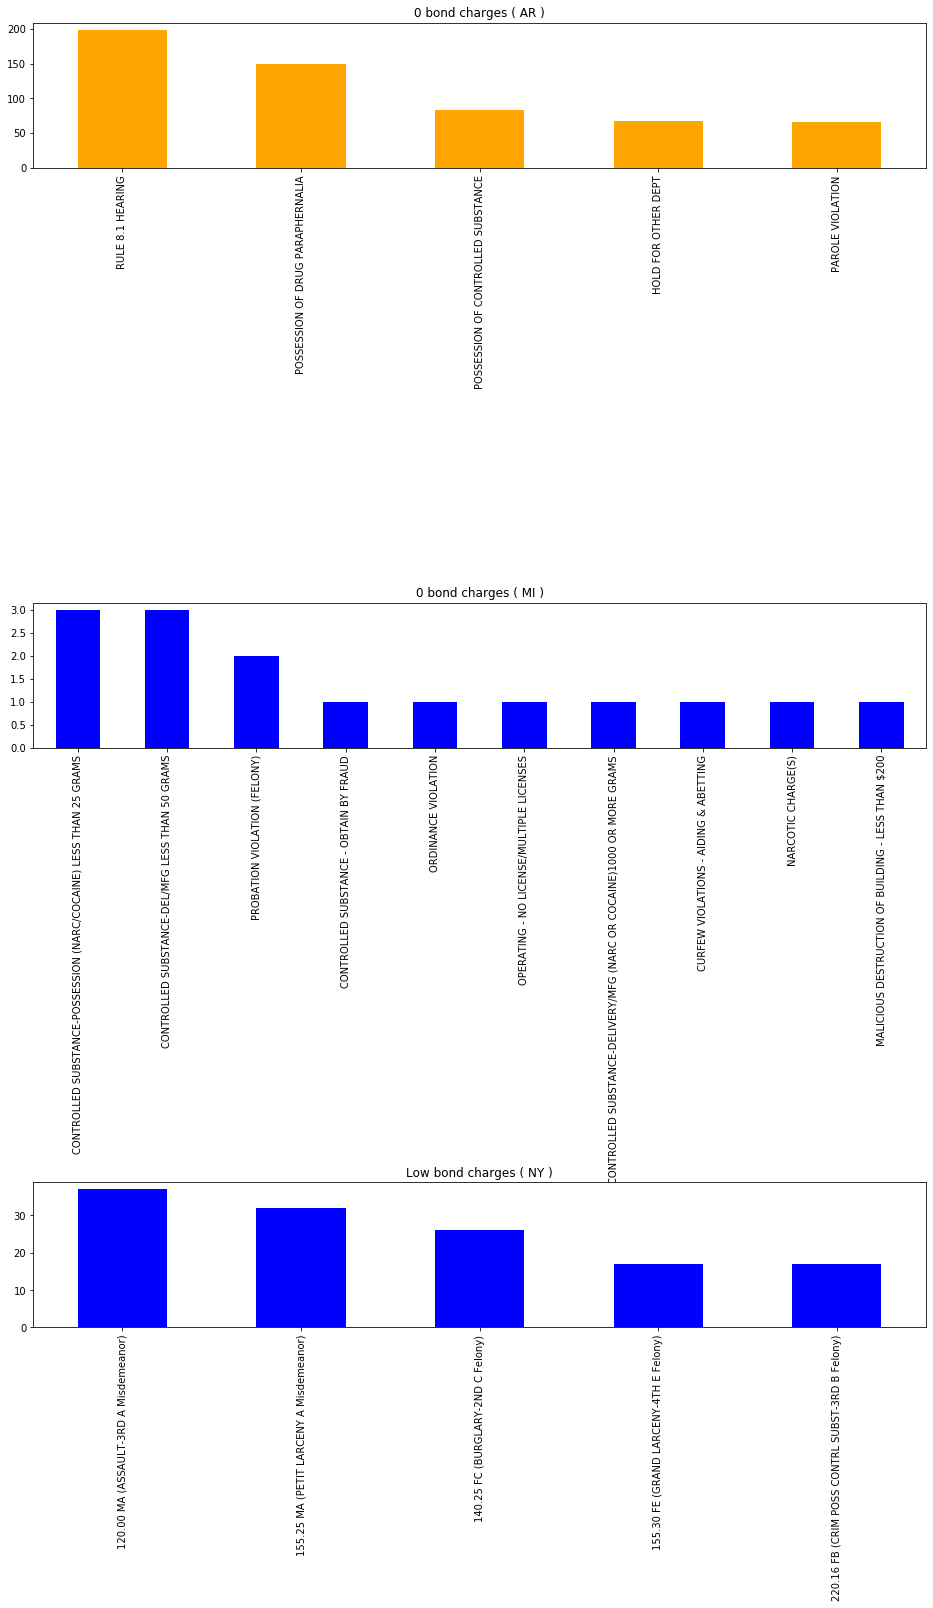

In [111]:
fig, axes = plt.subplots(nrows=3,ncols=1,figsize=(16,24))
plt.subplots_adjust(hspace=3)

low_bail = ["0","1","2","3","4","5","6","7","8","9"]

AR_zeros = dfArkansas.loc[dfArkansas["Bond"] == 0 ]
AR_zeros['Charge'].value_counts()[:5].plot(ax=axes[0],kind="bar",color="orange",title="0 bond charges ( AR )")

MI_zeros =dfMichigan.loc[dfMichigan[" Bond_Amount: "] == 0 ]
MI_zeros['Charge'].value_counts()[:10].plot(ax=axes[1],kind="bar",color="blue",title="0 bond charges ( MI )")

NY_zeros = dfNY.loc[dfNY["bond_info"].isin(low_bail)]
NY_zeros['charges'].value_counts()[:5].plot(ax=axes[2],kind="bar",color="blue",title="Low bond charges ( NY )")



C:\Users\Minyoung Na\anaconda\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':
C:\Users\Minyoung Na\anaconda\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


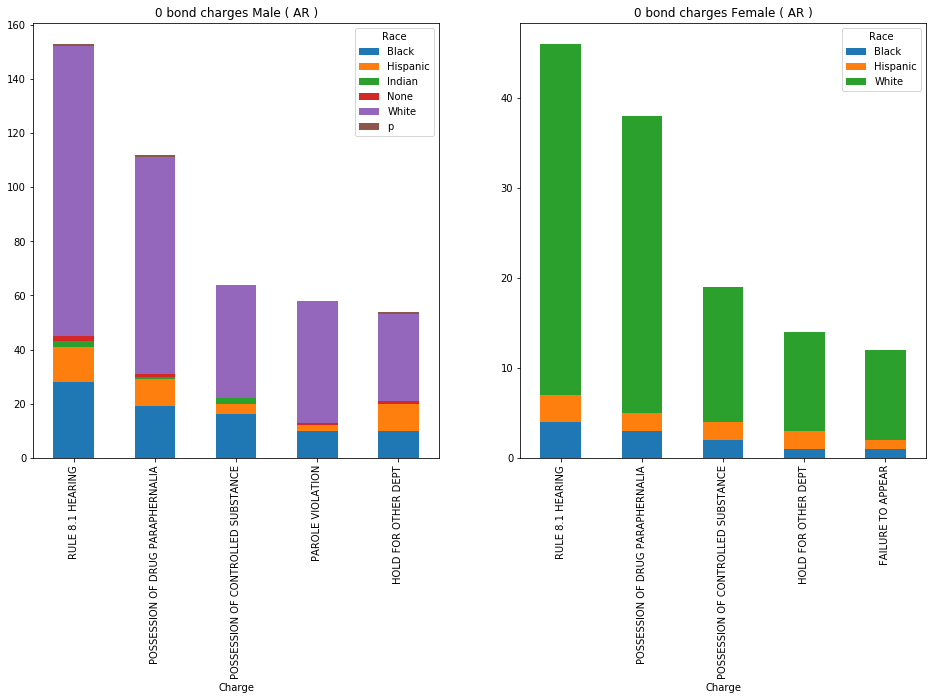

In [176]:

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(16,8))
plt.subplots_adjust(hspace=3)

AR_male = dfArkansas.loc[dfArkansas['Sex']=="M"]
AR_female = dfArkansas.loc[dfArkansas['Sex']=="F"]

AR_male = AR_male.loc[AR_male["Bond"] == 0 ]
AR_female = AR_female.loc[AR_female["Bond"] == 0 ]

AR_male = AR_male.groupby(["Race","Charge"])["Charge"].count().unstack('Race').fillna(0)
idx = AR_male.sum(axis=1).sort_values(ascending=False).index
AR_male = AR_male.ix[idx].head(5)
AR_male.plot(ax=axes[0],kind="bar",title="0 bond charges Male ( AR )", stacked=True)

AR_female = AR_female.groupby(["Race","Charge"])["Charge"].count().unstack('Race').fillna(0)
idx = AR_female.sum(axis=1).sort_values(ascending=False).index
AR_female = AR_female.ix[idx].head(5)
AR_female.plot(ax=axes[1],kind="bar",title="0 bond charges Female ( AR )", stacked=True)


C:\Users\Minyoung Na\anaconda\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
C:\Users\Minyoung Na\anaconda\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


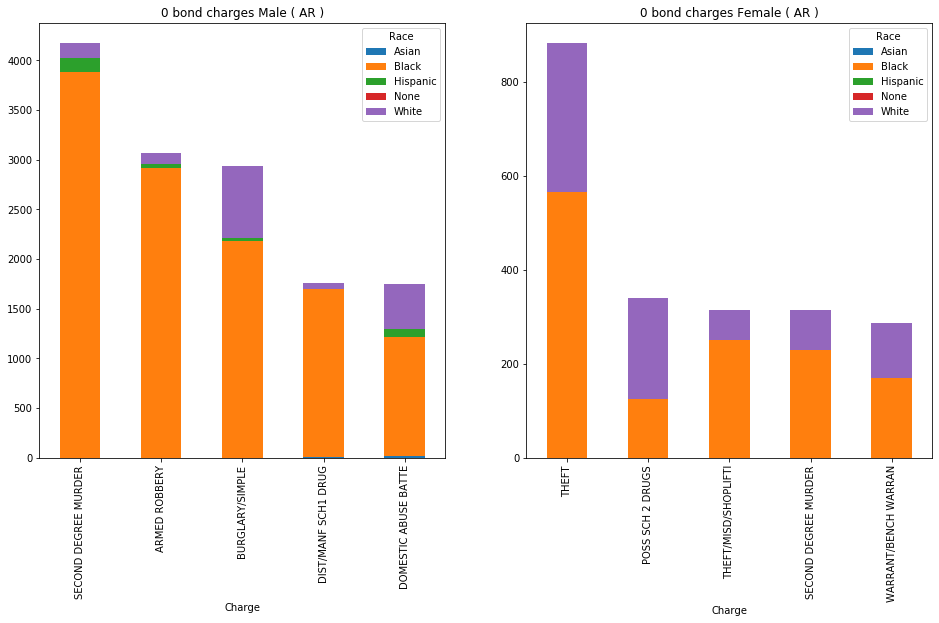

In [180]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(16,8))
plt.subplots_adjust(hspace=3)

LA_Male = dfLouisiana.loc[dfLouisiana['Sex']=="M"]
LA_Female = dfLouisiana.loc[dfLouisiana['Sex']=="F"]

LA_Male = LA_Male.groupby(["Race","Charge"])["Charge"].count().unstack('Race').fillna(0)
idx = LA_Male.sum(axis=1).sort_values(ascending=False).index
LA_Male = LA_Male.ix[idx].head(5)
LA_Male.plot(ax=axes[0],kind="bar",title="0 bond charges Male ( LA )", stacked=True)


LA_Female = LA_Female.groupby(["Race","Charge"])["Charge"].count().unstack('Race').fillna(0)
idx = LA_Female.sum(axis=1).sort_values(ascending=False).index
LA_Female = LA_Female.ix[idx].head(5)
LA_Female.plot(ax=axes[1],kind="bar",title="0 bond charges Female ( LA )", stacked=True)